In [2]:
import matplotlib.pyplot as plt
import datajoint as dj
import numpy as np

import seaborn as sns
import pandas as pd
from DMS2_utils import *
from DMS2_fetch_protocol_data import *

# settings
%load_ext autoreload
%autoreload 2
dj.blob.use_32bit_dims = True # necessary for pd.blob read
sns.set_context("talk")


[2023-04-22 15:48:56,947][INFO]: Connecting jbreda@bdata00.pni.princeton.edu:3306
[2023-04-22 15:48:57,128][INFO]: Connected jbreda@bdata00.pni.princeton.edu:3306


In [6]:
df = fetch_latest_training_data(date_min="2023-04-22")

[2023-04-24 10:00:22,982][WARNING]: MySQL server has gone away. Reconnecting to the server.


fetched 2 sessions for R610 between 2023-04-22 and 2023-04-23
fetched 2 sessions for R611 between 2023-04-22 and 2023-04-23
fetched 2 sessions for R612 between 2023-04-22 and 2023-04-23
fetched 2 sessions for R613 between 2023-04-22 and 2023-04-23
fetched 2 sessions for R614 between 2023-04-22 and 2023-04-23


In [7]:
make_daily_stage_plots(df, overwrite=False)

plotting stage 3 / 4 plot R610 on 2023-04-23
plotting stage 3 / 4 plot R611 on 2023-04-23
plotting stage 3 / 4 plot R612 on 2023-04-23
plotting stage 3 / 4 plot R613 on 2023-04-23
plotting spoke plot R614 on 2023-04-23


## Figures in progress below

In [278]:
for (date, animal_id), sub_df in df.groupby(['date','animal_id']):
    None

In [279]:
animal_id = 'R610'
sub_df = df.query("animal_id == 'R610' & date == @date")

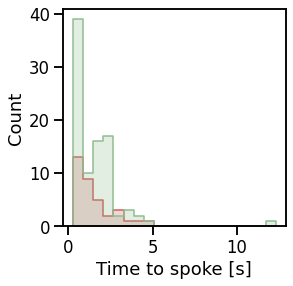

In [94]:
fig,ax = plt.subplots(figsize=(4,4))

plot_daily_first_spoke_hist(sub_df,ax)

[2023-04-19 16:55:46,829][WARNING]: MySQL server has gone away. Reconnecting to the server.


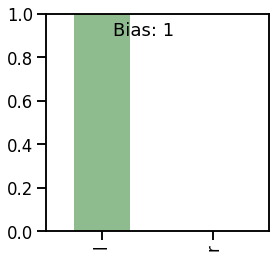

In [242]:
fig,ax=plt.subplots(figsize=(4,4))
plot_daily_side_bias(sub_df, ax=ax)

0.2222222222222222
0.5 None


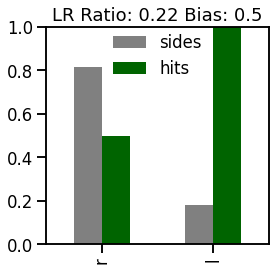

In [319]:
fig,ax=plt.subplots(figsize=(4,4))

#TODO debug for issues below
def plot_daily_side_bias_and_counts(df, ax):

    # get sub data (kind of hacky, but good enough for now)
    side_count = df.sides.value_counts(normalize=True)
    lr_hits = df.groupby(["sides"]).hits.mean()
    lr_hits.fillna(0,inplace=True) # for early side poke stages, there can be an nan for one side
    side_info_df = pd.merge(side_count, lr_hits, right_index = True,
                left_index = True)
    # plot
    side_info_df.plot(kind="bar", color=["gray", "darkgreen"],ax=ax)
    
    # title info
    bias = lr_hits["l"] - lr_hits["r"]
    lr_ratio = side_count["l"] / side_count["r"]
    print(bias, print(lr_ratio))
    ax.set(ylim=(0, 1), title=f"LR Ratio: {np.round(lr_ratio,2)} Bias: {np.round(bias, 2)}", xlabel="")
    
    ax.legend(frameon=False, borderaxespad=0)

plot_daily_side_bias_and_counts(sub_df,ax)

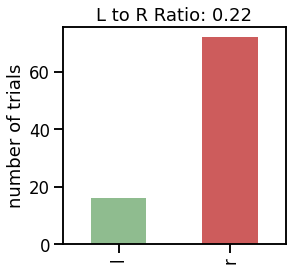

In [337]:
fig,ax=plt.subplots(figsize=(4,4))
plot_daily_side_counts(sub_df, ax)



In [243]:
# for (date, animal_id), sub_df in df.groupby(["date", "animal_id"]):
#     if sub_df.stage.max() >= 3:
#         make_daily_stage_3_4_plot(sub_df, overwrite=True)


plotting stage 3 plot R610 on 2023-04-17
plotting stage 3 plot R611 on 2023-04-17
plotting stage 3 plot R610 on 2023-04-18
plotting stage 3 plot R612 on 2023-04-18


KeyError: 'r'

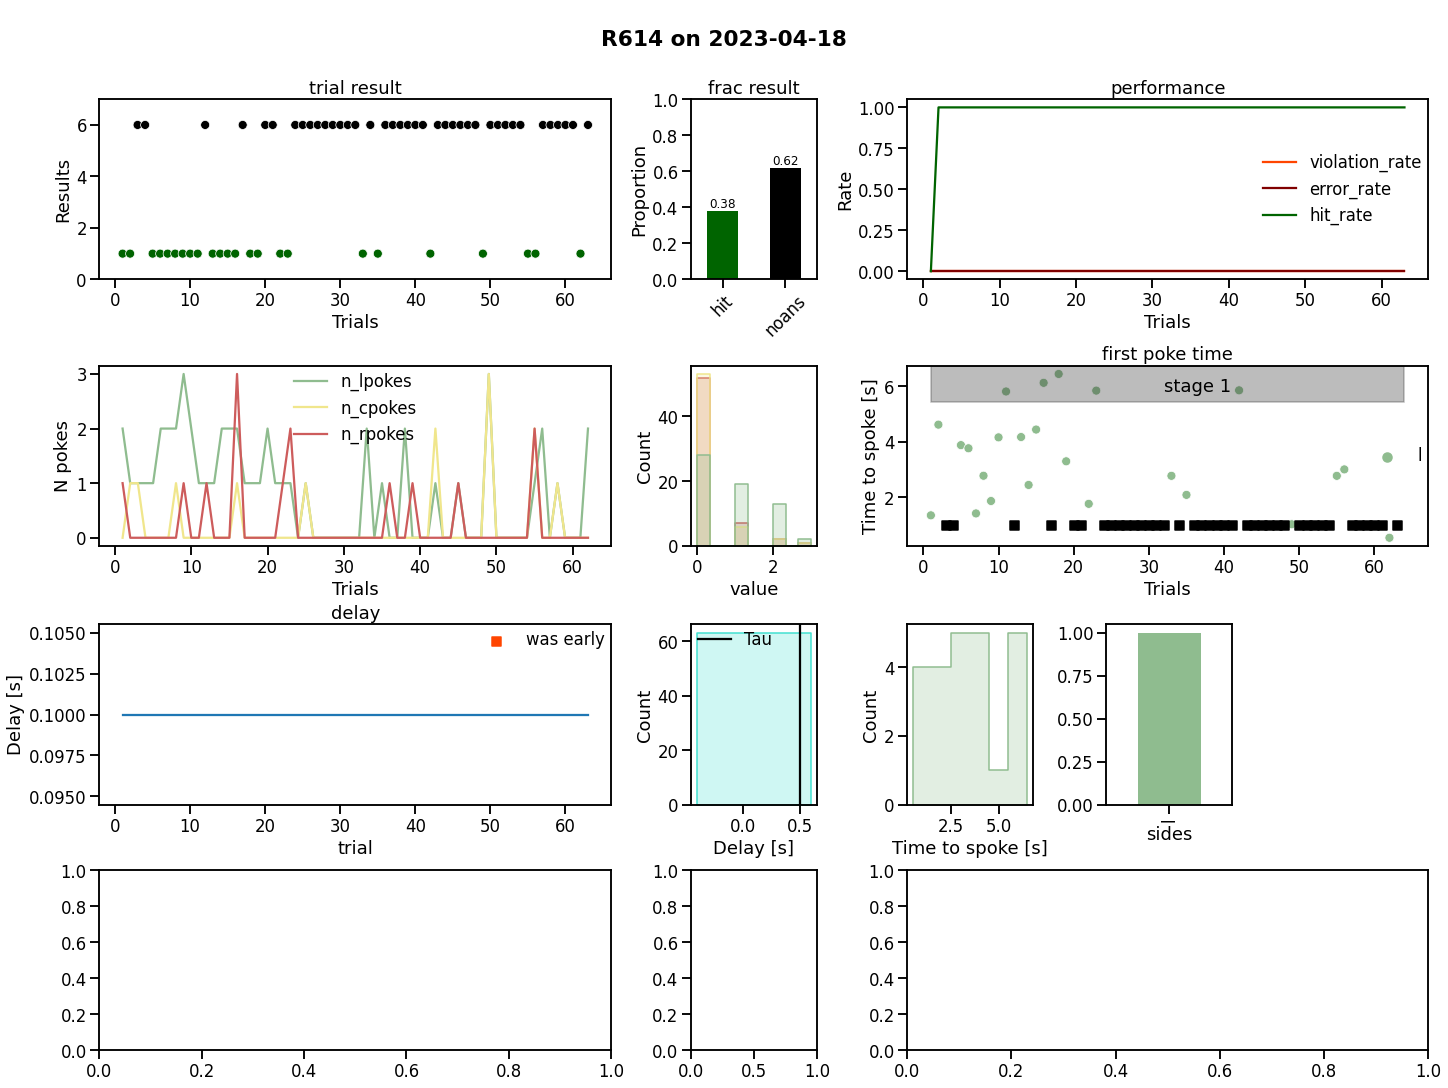

In [252]:
# TODO test with an animal in stage 3 or later
layout= """
    AAABCCC
    DDDEFFF
    GGGHIJ.
    KKKLMMM
    """
fig = plt.figure(constrained_layout=True,figsize=(20,15))

plt.suptitle(f"\n{animal_id} on {date}\n", fontweight="semibold")
ax_dict = fig.subplot_mosaic(layout) #ax to plot to
# identify_axes(ax_dict) # prints the letter for id

## ROW 1
plot_daily_results(sub_df,ax=ax_dict['A'], title="trial result")
plot_daily_result_summary(sub_df, ax=ax_dict['B'], title="frac result")
plot_daily_perfs(sub_df, ax_dict['C'], title="performance")

## ROW 2
plot_daily_npokes(sub_df,ax_dict['D'], plot_stage_info=False)
plot_pokes_hist(sub_df, ax_dict['E'], title="pokes summary")
plot_daily_first_spoke(sub_df, ax_dict['F'], title="first poke time",plot_stage_info=True)

## ROW 3
plot_daily_delay_dur(sub_df, ax_dict['G'], title="delay")
plot_delay_early_spoke_hist(sub_df, ax_dict['H'])
plot_daily_first_spoke_hist(sub_df,ax_dict['I'])
plot_daily_side_bias(sub_df, ax=ax_dict['J'])

# ROW 4
plot_daily_viol_pre_go_durs(sub_df, ax_dict['K'])
plot_daily_water(sub_df, ax_dict['L'], title= "water")
plot_daily_trial_dur(sub_df, ax_dict['M'], title="trial dur")

    

In [212]:
make_daily_spoke_stage_plot(df, overwrite=True)

plotting for R610
plotting for R611
plotting for R612
plotting for R613
plotting for R614


In [283]:
sub_df #TODO Work with this to make the stage 4 plot you'd like
# add in the violtion color, remove delay, make viol_off dashed,
# add in the bias and proportions
# eventually, fix the first poke time plot

,trial,animal_id,date,sess_id,result,hits,violations,temperror,hit_rate,error_rate,...,l_water_vol,r_water_vol,ab_l_prob,ab_r_prob,ab_beta,ab_tau,sound_pair,exp_del_tau,exp_del_min,exp_del_max
473,1,R610,2023-04-20,912697,3,<NA>,1,<NA>,0.00,0.0,...,10.0,10.0,0.500000,0.500000,3.0,30.0,"12.0, 3.0",0.3,0.2,0.7
474,2,R610,2023-04-20,912697,1,1,0,0,NaN,NaN,...,10.0,10.0,0.500000,0.500000,3.0,30.0,"12.0, 12.0",0.3,0.2,0.7
475,3,R610,2023-04-20,912697,3,<NA>,1,<NA>,1.00,0.0,...,10.0,10.0,0.500000,0.500000,3.0,30.0,"3.0, 3.0",0.3,0.2,0.7
476,4,R610,2023-04-20,912697,3,<NA>,1,<NA>,1.00,0.0,...,10.0,10.0,0.500000,0.500000,3.0,30.0,"12.0, 3.0",0.3,0.2,0.7
477,5,R610,2023-04-20,912697,1,1,0,0,1.00,0.0,...,10.0,10.0,0.500000,0.500000,3.0,30.0,"12.0, 12.0",0.3,0.2,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,84,R610,2023-04-20,912697,4,0,0,1,0.58,0.0,...,10.0,10.0,0.237894,0.762106,3.0,30.0,"12.0, 3.0",0.3,0.2,0.7
557,85,R610,2023-04-20,912697,1,1,0,0,0.57,0.0,...,10.0,10.0,0.224169,0.775831,3.0,30.0,"12.0, 12.0",0.3,0.2,0.7
558,86,R610,2023-04-20,912697,1,1,0,0,0.57,0.0,...,10.0,10.0,0.224169,0.775831,3.0,30.0,"12.0, 3.0",0.3,0.2,0.7
559,87,R610,2023-04-20,912697,3,<NA>,1,<NA>,0.58,0.0,...,10.0,10.0,0.233603,0.766397,3.0,30.0,"3.0, 12.0",0.3,0.2,0.7


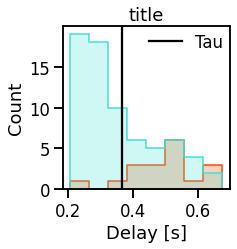

In [301]:
def plot_
fig,ax=plt.subplots(figsize=(3,3))
sns.histplot(
        data=sub_df,
        x="delay_dur",
        hue=sub_df.violations.astype("category"),
        hue_order=[False, True],
        palette=["turquoise", "orangered"],
        element="step",
        legend=False)

ax.axvline(x=df.exp_del_tau.mean(), color="black", label="Tau")

ax.set(xlabel="Delay [s]", title="title")
ax.legend(frameon=False, borderaxespad=0)


In [307]:

def plot_delay_poke_hist(df, ax, plot_type="early", title=""):
    if plot_type == "early":
        hue = "valid_early_spoke"
    elif plot_type == "viol":
        hue = df.violations.astype("category")

    sns.histplot(
        data=df,
        x="delay_dur",
        hue=hue,
        hue_order=[False, True],
        palette=["turquoise", "orangered"],
        element="step",
        ax=ax,
        legend=False,
    )
    ax.axvline(x=df.exp_del_tau.mean(), color="black", label="Tau")

    ax.set(xlabel="Delay [s]", title=plot_type)
    ax.legend(frameon=False, borderaxespad=0)

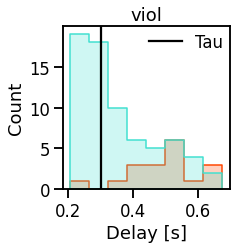

In [309]:
fig,ax=plt.subplots(figsize=(3,3))

plot_delay_poke_hist(sub_df, ax, plot_type="viol")

In [339]:
make_daily_stage_3_4_plot(sub_df, overwrite=True, date=None, animal_id=None)

plotting stage 3 / 4 plot R610 on 2023-04-20
